In [153]:
import tensorflow as tf
from __future__ import  print_function
import numpy as np
import matplotlib.pyplot as plt

In [154]:
from tensorflow.python.keras import backend as K
K.clear_session()
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Activation, Flatten, Dense
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.python.keras.utils import to_categorical


In [182]:
class LeNet:
    @staticmethod
    def build(input_shape,classes):
        model=Sequential()
        
        model.add(Conv2D(10,kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        
        model.add(Conv2D(50,kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        
        model.add(Flatten())
        model.add(Dense(100))
        model.add(Activation("relu"))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [183]:
np.random.seed(1671)
NB_EPOCHS=5
BATCH_SIZE=32
VERBOSE=1
NB_CLASSES=10
OPTIMIZER = Adam()
N_HIDDEN=128
VALIDATION_SPLIT=0.2
RESHAPED=784
N_HIDDEN=128
DROPOUT=0.3
IMG_ROWS, IMG_COLS =28, 28
INPUT_SHAPE=(IMG_ROWS,IMG_COLS,1)



In [184]:
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()
X_train=X_train.astype('float32')
Y_train=Y_train.astype('float32')


In [185]:
X_train=X_train/255
X_test=X_test/255
X_train=X_train[:,:,:,np.newaxis]
X_test=X_test[:,:,:,np.newaxis]
print (X_train.shape)
print (X_test.shape)
print (X_train.shape[0], 'train samples')
print (X_test.shape[0], 'test samples')

Y_train=to_categorical(Y_train, NB_CLASSES)
Y_test=to_categorical(Y_test, NB_CLASSES)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
60000 train samples
10000 test samples


In [186]:
model=LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy",optimizer=OPTIMIZER, metrics=["accuracy"])


In [187]:
history = model.fit(X_train, Y_train, batch_size= BATCH_SIZE, epochs= NB_EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================]48000/48000 [==============================] - 22s 468us/step - loss: 0.1524 - acc: 0.9533 - val_loss: 0.0577 - val_acc: 0.9825



In [188]:
score=model.evaluate(X_test,Y_test,verbose=VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])
print(history.history.keys())

10000/10000 [==============================]10000/10000 [==============================] - 1s 129us/step

Test score: 0.053399666797742246
Test accuracy: 0.9822
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


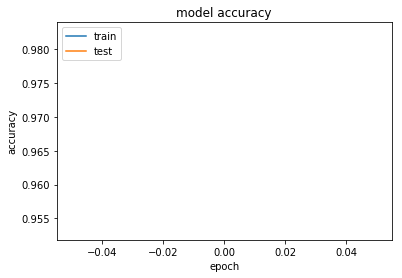

In [190]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

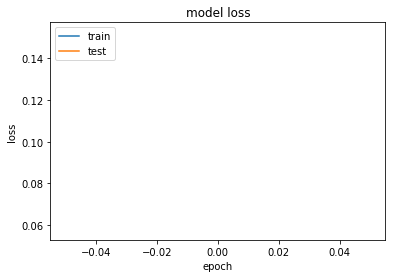

In [191]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [192]:
model_json=model.to_json()
open('conv_net_example_arch.json', 'w').write(model_json)
model.save_weights('conv_net_example_arch.h5',overwrite=True)

In [198]:
img_names=[]
import scipy.misc
folder='/home/alex/Downloads/mnistasjpg/trainingSample/'
f1=folder+'img_124.jpg'
img1=scipy.misc.imread(f1)

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [199]:
print(img1.shape)

(28, 28)


In [200]:
img1=img1[np.newaxis,:,:,np.newaxis]

In [201]:
print(img1.shape)

(1, 28, 28, 1)


In [202]:
model.predict(img1)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)